In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
Hitters = pd.read_csv(url,index_col=0,parse_dates=[0])
## Drop Nan
Hitters = Hitters.dropna() 

In [131]:
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.000,A
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,517.143,A


In [132]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

y = Hitters.Salary
x = Hitters.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)

# Lasso

In [133]:
alphas = 10**np.linspace(6,-2,100)*0.5
print(alphas)

[5.00000000e+05 4.15108784e+05 3.44630605e+05 2.86118383e+05
 2.37540508e+05 1.97210303e+05 1.63727458e+05 1.35929412e+05
 1.12850986e+05 9.36908711e+04 7.77838072e+04 6.45774833e+04
 5.36133611e+04 4.45107543e+04 3.69536102e+04 3.06795364e+04
 2.54706901e+04 2.11462144e+04 1.75559587e+04 1.45752653e+04
 1.21006413e+04 1.00461650e+04 8.34050269e+03 6.92443186e+03
 5.74878498e+03 4.77274228e+03 3.96241449e+03 3.28966612e+03
 2.73113861e+03 2.26743925e+03 1.88246790e+03 1.56285792e+03
 1.29751211e+03 1.07721735e+03 8.94324765e+02 7.42484131e+02
 6.16423370e+02 5.11765511e+02 4.24876718e+02 3.52740116e+02
 2.92851041e+02 2.43130079e+02 2.01850863e+02 1.67580133e+02
 1.39127970e+02 1.15506485e+02 9.58955131e+01 7.96141397e+01
 6.60970574e+01 5.48749383e+01 4.55581378e+01 3.78231664e+01
 3.14014572e+01 2.60700414e+01 2.16438064e+01 1.79690683e+01
 1.49182362e+01 1.23853818e+01 1.02825615e+01 8.53676324e+00
 7.08737081e+00 5.88405976e+00 4.88504979e+00 4.05565415e+00
 3.36707533e+00 2.795405

In [134]:
lasso = linear_model.Lasso(max_iter=10000, normalize=True)
coefs = []

#The list that helps to check the final three predictors that remain in the model
coeffient_check = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(x, y)
    result = lasso.coef_
    coefs.append(result)
    if sum(x != 0 for x in result) == 3:
        coeffient_check.append(result)
    
np.shape(coefs)

(100, 16)

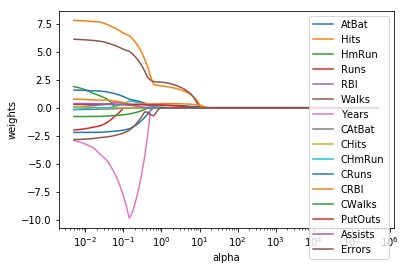

In [135]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(x.columns.values)

plt.show()

In [136]:
print("The final three predictors that remain in the model:")
for i in range(0,16,1):
    if coeffient_check[0][i] != 0:
        print(list(x.columns.values)[i])

The final three predictors that remain in the model:
Hits
CRuns
CRBI


In [137]:
lassocv = linear_model.LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x,y)
print("The optimal value of the regularization penality got from CV is: ", lassocv.alpha_)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x,y)
print("The predictors that remain in the model with the optimal value of the regularization penality:")

for i in range(0,16,1):
    if lasso.coef_[i] != 0:
        print(list(x.columns.values)[i])

The optimal value of the regularization penality got from CV is:  0.0635481759985745
The predictors that remain in the model with the optimal value of the regularization penality:
AtBat
Hits
Runs
RBI
Walks
Years
CAtBat
CHmRun
CRuns
CRBI
CWalks
PutOuts
Assists
Errors


# Ridge

In [139]:
ridge = linear_model.Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 16)

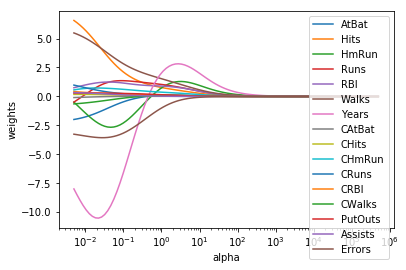

In [142]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.legend(x.columns.values)

plt.show()

In [147]:
ridgecv = linear_model.RidgeCV(alphas = 10**np.linspace(10,-2,500)*0.5, cv = 10, normalize = True)
ridgecv.fit(x,y)
print("The optimal value of the regularization penality got from CV is: ", ridgecv.alpha_)

ridge.set_params(alpha = ridgecv.alpha_)
ridge.fit(x, y)
ridge.coef_

The optimal value of the regularization penality got from CV is:  0.9628067860646012


array([ 0.09167139,  0.78378329,  0.70010067,  1.04243996,  0.89854177,
        1.54729504,  1.96216267,  0.01126069,  0.05334513,  0.37284335,
        0.1074515 ,  0.11113522,  0.06612667,  0.15116195,  0.02565016,
       -1.03193126])

# 1.2

The bias-variance tradeoff means that there is a relationship that $Expected$ $prediction$ $error$ $= Variance + Bias^2 + Noise$. If there is underfitting in the model, then the bias will be high and the variance will be low, while the variance is high and bias is low when there is overfitting in the model. With the models with regularization, the final model will get a litte higher bias and a much lower variance. 
The regularization will help us to prevent the models to be overfitting. In both lasso and ridge models, a larger penalty parameter means that there are more restrctions for the coefficients (in case they are too large and the variance will be too large), so that the bias is larger and the variance will be smaller. When the penalty approaches $\infty$, all the coefficients will approch 0 (they will be 0 in lasso). 
The coefficient trajectories give us a good illustration of the bias-variance tradeoff: When alpha is small, coefficients are huge (low bias and high variance). And coefficients are approaching to 0 (high bias and low variance) when the alpha is large.